In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path= "Resources/top5bookies.csv"

In [3]:
data=pd.read_csv(data_path)

In [4]:
data.head()

,ID,League,Date,Time,Matchup_US_P,Visitor_Team,Home_Team,Visitor_Odd,Draw_Odd,Home_Odd,Bookies_choice,Sibyl,Confidence,Divergence_Y/N,Visi_Team_PTS,Home_Team_PTS,True_Result,Winner_Odd
0,0,ligue-1,2016-08-12,19:30,Guingamp @ Monaco,Guingamp,Monaco,5.50,3.70,1.69,Monaco,Monaco,0.559,N,2,2,Draw,3.70
1,1,premier-league,2016-08-13,15:00,Tottenham @ Everton,Tottenham,Everton,2.19,3.40,3.55,Tottenham,Everton,0.385,Y,1,1,Draw,3.40
2,2,premier-league,2016-08-13,15:00,Swansea City @ Burnley,Swansea City,Burnley,2.82,3.15,2.77,Burnley,Burnley,0.577,N,1,0,Swansea City,2.82
3,3,premier-league,2016-08-13,15:00,West Bromwich @ Crystal Palace,West Bromwich,Crystal Palace,3.91,3.17,2.17,Crystal Palace,Crystal Palace,0.385,N,1,0,West Bromwich,3.91
4,4,premier-league,2016-08-13,15:00,Watford @ Southampton,Watford,Southampton,4.86,3.71,1.79,Southampton,Southampton,0.427,N,1,1,Draw,3.71


In [5]:
data2= data.drop(columns=['Sibyl', 'Confidence', 'Divergence_Y/N', 'Visi_Team_PTS', 'Home_Team_PTS', 'Winner_Odd'])

In [6]:
data2

,ID,League,Date,Time,Matchup_US_P,Visitor_Team,Home_Team,Visitor_Odd,Draw_Odd,Home_Odd,Bookies_choice,True_Result
0,0,ligue-1,2016-08-12,19:30,Guingamp @ Monaco,Guingamp,Monaco,5.50,3.70,1.69,Monaco,Draw
1,1,premier-league,2016-08-13,15:00,Tottenham @ Everton,Tottenham,Everton,2.19,3.40,3.55,Tottenham,Draw
2,2,premier-league,2016-08-13,15:00,Swansea City @ Burnley,Swansea City,Burnley,2.82,3.15,2.77,Burnley,Swansea City
3,3,premier-league,2016-08-13,15:00,West Bromwich @ Crystal Palace,West Bromwich,Crystal Palace,3.91,3.17,2.17,Crystal Palace,West Bromwich
4,4,premier-league,2016-08-13,15:00,Watford @ Southampton,Watford,Southampton,4.86,3.71,1.79,Southampton,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...
328,328,serie-a,2016-10-16,14:00,Cagliari @ Inter Milan,Cagliari,Inter Milan,9.49,5.14,1.35,Inter Milan,Cagliari
329,329,serie-a,2016-10-16,14:00,Empoli @ Genoa,Empoli,Genoa,4.95,3.50,1.81,Genoa,Draw
330,330,serie-a,2016-10-16,14:00,Crotone @ Sassuolo,Crotone,Sassuolo,6.73,4.15,1.54,Sassuolo,Sassuolo
331,331,serie-a,2016-10-16,19:45,AC Milan @ Chievo,AC Milan,Chievo,2.55,3.07,3.11,AC Milan,AC Milan


In [7]:
#How often bookies bet on home team?
home_df = data2[["Home_Team","Bookies_choice","True_Result"]]
bookie_df=home_df.loc[(home_df["Bookies_choice"] == home_df["Home_Team"]),:]
bookie_df

,Home_Team,Bookies_choice,True_Result
0,Monaco,Monaco,Draw
2,Burnley,Burnley,Swansea City
3,Crystal Palace,Crystal Palace,West Bromwich
4,Southampton,Southampton,Draw
5,Middlesbrough,Middlesbrough,Draw
...,...,...,...
326,Fiorentina,Fiorentina,Draw
327,Lazio Roma,Lazio Roma,Draw
328,Inter Milan,Inter Milan,Cagliari
329,Genoa,Genoa,Draw


In [8]:
#The home team didn't win
loss_df=bookie_df.loc[(bookie_df["Home_Team"] != bookie_df["True_Result"]),:]
loss_df


,Home_Team,Bookies_choice,True_Result
0,Monaco,Monaco,Draw
2,Burnley,Burnley,Swansea City
3,Crystal Palace,Crystal Palace,West Bromwich
4,Southampton,Southampton,Draw
5,Middlesbrough,Middlesbrough,Draw
...,...,...,...
324,Pescara,Pescara,Draw
326,Fiorentina,Fiorentina,Draw
327,Lazio Roma,Lazio Roma,Draw
328,Inter Milan,Inter Milan,Cagliari


In [9]:
loss=loss_df["True_Result"].count()
print(f"The bookies' choice of the home team lost {loss} times.")

The bookies' choice of the home team lost 102 times.


In [10]:
#The home team did win
win_df=bookie_df.loc[(bookie_df["Home_Team"] == bookie_df["True_Result"]),:]
win_df

,Home_Team,Bookies_choice,True_Result
6,Bordeaux,Bordeaux,Bordeaux
7,Manchester City,Manchester City,Manchester City
8,Caen,Caen,Caen
9,Montpellier,Montpellier,Montpellier
15,Nice,Nice,Nice
...,...,...,...
319,Malaga,Malaga,Malaga
321,AS Roma,AS Roma,AS Roma
322,Lyon,Lyon,Lyon
325,Juventus,Juventus,Juventus


In [11]:
win = win_df["True_Result"].count()
print(f"The bookies' choice of the home team win {win} times.")

The bookies' choice of the home team win 132 times.


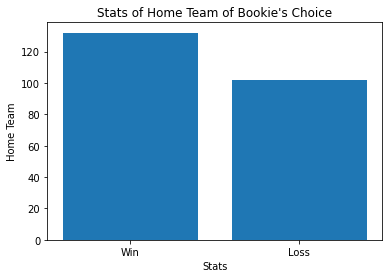

In [12]:
# Bar Graph for status of Home Team
stats = ["Win","Loss"]
y_axis= [win,loss]
plt.bar(stats,y_axis)
plt.title("Stats of Home Team of Bookie's Choice")
plt.xlabel("Stats")
plt.ylabel("Home Team")
plt.show()